In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from networks import NoKafnet, Kafnet
import utils.datasetsUtils.CIFAR as CIFAR
from utils.datasetsUtils.taskManager import SingleTargetClassificationTask, NoTask
from configs.configs import DefaultConfig
from torchvision.transforms import transforms
import torch
from Trainer import Trainer
import matplotlib.pyplot as plt
from collections import defaultdict
import copy
import numpy as np

In [3]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(torch.cuda.current_device()))

True
1
GeForce GTX 1050


In [4]:
config = DefaultConfig()
config.EPOCHS = 1
print(config)

confing_no_ewt = copy.copy(config)
confing_no_ewt.USE_EWT = False
print(confing_no_ewt)

CONFIG PARAMETERSBATCH_SIZE: 12
DEVICE: cuda
EPOCHS: 1
EWC_IMPORTANCE: 1000
EWC_SAMPLE_SIZE: 250
IS_CONVOLUTIONAL: True
ITERS: 1
L1_REG: 0.0001
LOSS: cross_entropy
LR: 0.001
MODEL_NAME: 
OPTIMIZER: SGD
RUN_NAME: default
USE_EWC: True
USE_TENSORBOARD: True

CONFIG PARAMETERSBATCH_SIZE: 12
DEVICE: cuda
EPOCHS: 1
EWC_IMPORTANCE: 1000
EWC_SAMPLE_SIZE: 250
IS_CONVOLUTIONAL: True
ITERS: 1
L1_REG: 0.0001
LOSS: cross_entropy
LR: 0.001
MODEL_NAME: 
OPTIMIZER: SGD
RUN_NAME: default
USE_EWC: True
USE_EWT: False
USE_TENSORBOARD: True



In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))]
)

dataset = CIFAR.Cifar10('../data/cifar10', SingleTargetClassificationTask(), download=True,
                        force_download=False, train_split=0.8, transform=transform, target_transform=None)
dataset.load_dataset()

dataset_noewt = CIFAR.Cifar10('../data/cifar10', SingleTargetClassificationTask(), download=True,
                        force_download=False, train_split=0.8, transform=transform, target_transform=None)

dataset_noewt.load_dataset()

../data/cifar10/download
task #0 with train 48000 and test 12000 images (label: airplane)
task #1 with train 48000 and test 12000 images (label: automobile)
task #2 with train 48000 and test 12000 images (label: bird)
task #3 with train 48000 and test 12000 images (label: cat)
task #4 with train 48000 and test 12000 images (label: deer)
task #5 with train 48000 and test 12000 images (label: dog)
task #6 with train 48000 and test 12000 images (label: frog)
task #7 with train 48000 and test 12000 images (label: horse)
task #8 with train 48000 and test 12000 images (label: ship)
task #9 with train 48000 and test 12000 images (label: truck)
../data/cifar10/download
task #0 with train 48000 and test 12000 images (label: airplane)
task #1 with train 48000 and test 12000 images (label: automobile)
task #2 with train 48000 and test 12000 images (label: bird)
task #3 with train 48000 and test 12000 images (label: cat)
task #4 with train 48000 and test 12000 images (label: deer)
task #5 with tra

In [6]:
net_ewt = NoKafnet.CNN(dataset.tasks_number)
net_no_ewt = NoKafnet.CNN(dataset.tasks_number)

print('Numero di parametri rete classica: ', sum([torch.numel(p) for p in net_ewt.parameters()]))
#print('Numero di parametri KAFNET: ', sum([torch.numel(p) for p in kafnet.parameters()]))

Numero di parametri rete classica:  171732


In [7]:
trainer_ewt = Trainer(net_ewt, dataset, config)
trainer_no_ewt = Trainer(net_no_ewt, dataset_noewt, confing_no_ewt)

In [8]:
results_ewt = trainer_ewt.all_tasks()

Testing task 2: 100%|██████████| 1000/1000 [00:03<00:00, 265.48it/s, batch#=1e+03]
/home/jary/miniconda3/envs/tesi/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
Testing task 8: 100%|██████████| 1000/1000 [00:03<00:00, 268.15it/s, batch#=1e+03]
/media/jary/DATA/Uni/tesi/codice/utils/datasetsUtils/dataset.py:55: UserWarning: No more tasks...
  self._current_task = self._n_tasks - 1


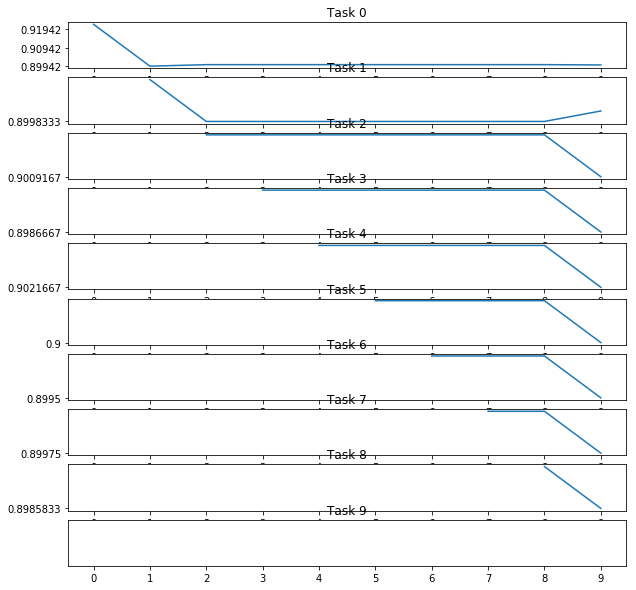

In [9]:
results_ewt
n_task = len(results_ewt)
tot_epochs = max([len(i['metrics']) for _, i in results_ewt.items()])
results_ewt

fig = plt.figure()
ax = None

#ax = fig.add_subplot(1, 1, 1)

for i, (task, values) in enumerate(results_ewt.items()):
    x = range(tot_epochs-len(values['metrics']) , tot_epochs)
    m = defaultdict(list)

    for item in values['metrics']:
        for k, v in item.items():
            m[k].append(v)
            
    #if ax is not None:
    ax = fig.add_subplot(n_task, 1, i+1, sharex=ax) 
    #else:
    #    ax = fig.add_subplot(n_task, 1, i+1) 
    
    acc = m['accuracy']

    ax.plot(x, acc)
    ax.set_xticks(range(tot_epochs),minor=False)
    
    ax.set_yticks(np.arange(min(acc), max(acc), 0.01))
    ax.set_title("Task {}".format(task))
    

In [10]:
results_no_ewt = trainer_no_ewt.all_tasks()

Testing task 8: 100%|██████████| 1000/1000 [00:03<00:00, 273.93it/s, batch#=1e+03]


In [ ]:
n_task = len(results_no_ewt)
tot_epochs = max([len(i['metrics']) for _, i in results_no_ewt.items()])

fig = plt.figure()
ax = None

#ax = fig.add_subplot(1, 1, 1)

for i, (task, values) in enumerate(results_no_ewt.items()):
    x = range(tot_epochs-len(values['metrics']) , tot_epochs)
    m = defaultdict(list)

    for item in values['metrics']:
        for k, v in item.items():
            m[k].append(v)
            
    #if ax is not None:
    ax = fig.add_subplot(n_task, 1, i+1, sharex=ax) 
    #else:
    #    ax = fig.add_subplot(n_task, 1, i+1) 
    
    acc = m['accuracy']

    ax.plot(x, acc)
    ax.set_xticks(range(tot_epochs),minor=False)
    
    ax.set_yticks(np.arange(min(acc), max(acc), 0.01))
    ax.set_title("Task {}".format(task))
    